In [2]:
import pymongo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio, display
from nltk.tokenize import word_tokenize
import math
import warnings
warnings.filterwarnings('ignore')

In [3]:
client = pymongo.MongoClient("mongodb://localhost:27017")
db = client.job_search_db.job_descriptions

In [4]:
jobs = [job["Description"] for job in db.find()]

word_list = []
for job in jobs:
    for word in job:
        word_list.append(word)
        
word_list.sort()
len(word_list)

43376

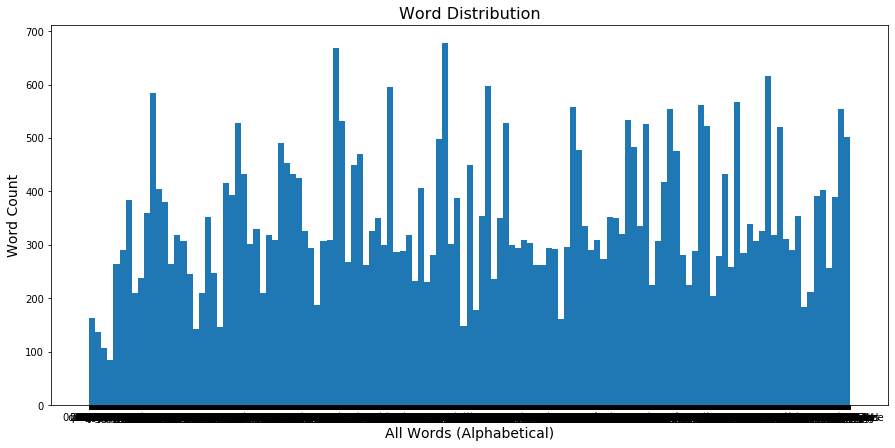

In [5]:
plt.subplots(figsize=(15,7))
plt.hist(word_list, bins=125)
plt.title("Word Distribution", fontsize=16)
plt.ylabel("Word Count", fontsize=14)
plt.xlabel(f"All Words (Alphabetical)", fontsize=14)
plt.show()

In [6]:
# Finding frequencies of all words
term_freq = {}
for word in word_list: 
    if word in term_freq: 
        term_freq[word]+=1
    else: 
        term_freq[word]=1

In [7]:
# Sorting
sort_freq=sorted(term_freq.items(), key=lambda x: x[1], reverse=True)
top_terms_freq=sort_freq[:100]

In [8]:
# Hard-coded cleaning
drop_words = ["full", "time", "work", "experience", "the", "use", "we", "need", "us", "include", "service", "year", "this", "apply"]
# Finding top terms in dict format
top_terms_dict={}
for each_term_freq in top_terms_freq: 
    if type(each_term_freq[0])==tuple: 
        top_terms_dict[' '.join(each_term_freq[0])]=each_term_freq[1]
    else: 
        top_terms_dict[each_term_freq[0]]=each_term_freq[1]
        
    if (each_term_freq[1] == 216) or (each_term_freq[0] in drop_words):
        top_terms_dict.pop(each_term_freq[0])

In [9]:
import wordcloud
import random
# wordcloud=wordcloud.WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(' '.join(term_list))
# wordcloud=wordcloud.WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(' '.join(term_list))
wordcloud=wordcloud.WordCloud(width=800, height=800, background_color='white', min_font_size=15).generate_from_frequencies(top_terms_dict)

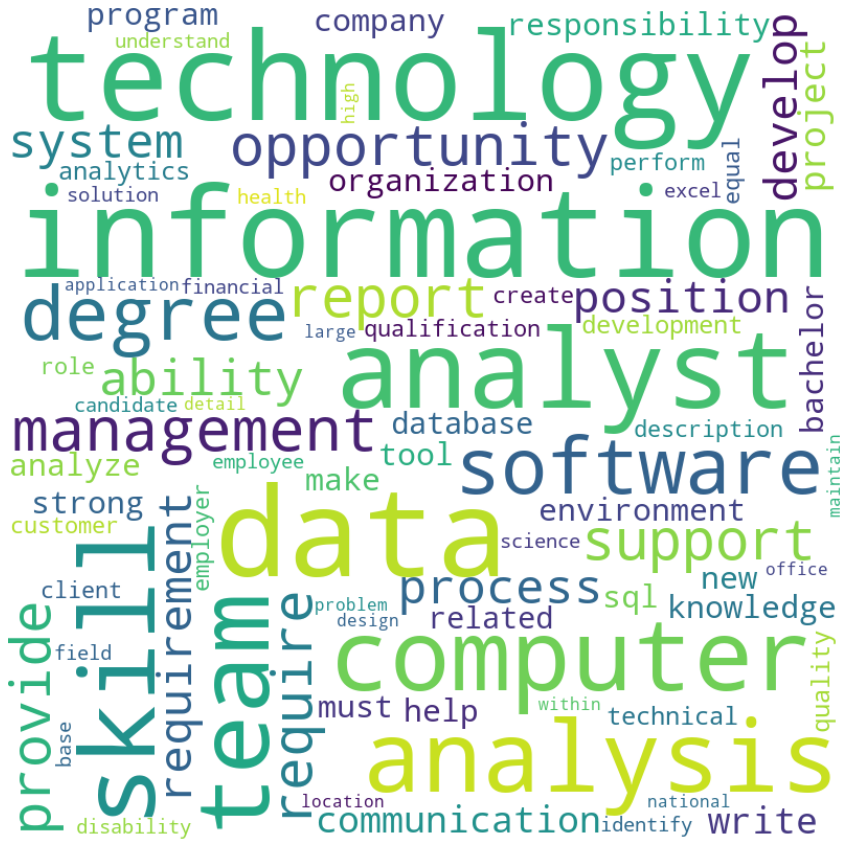

In [10]:
plt.figure(figsize=(15,17))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
# plt.savefig("wordcloud.png")
plt.show()

In [11]:
languages = ["python", "sql", "r", "nosql", "html", "css", "javascript", "tableau", "hadoop", "pandas", "numpy", "mongodb", "ML"]
lang_list = []
for word in word_list:
    if word == "machine":
        word = "ML"
    if word in languages:
        lang_list.append(word)

In [12]:
lang_dict = {}
for lang in lang_list:
    if lang in lang_dict:
        lang_dict[lang] += 1
    else:
        lang_dict[lang] = 1

In [13]:
# Sorting
sort_freq=sorted(lang_dict.items(), key=lambda x: x[1], reverse=False)

sorted_freq = {}
for lang, num in sort_freq:
    sorted_freq[lang]=num

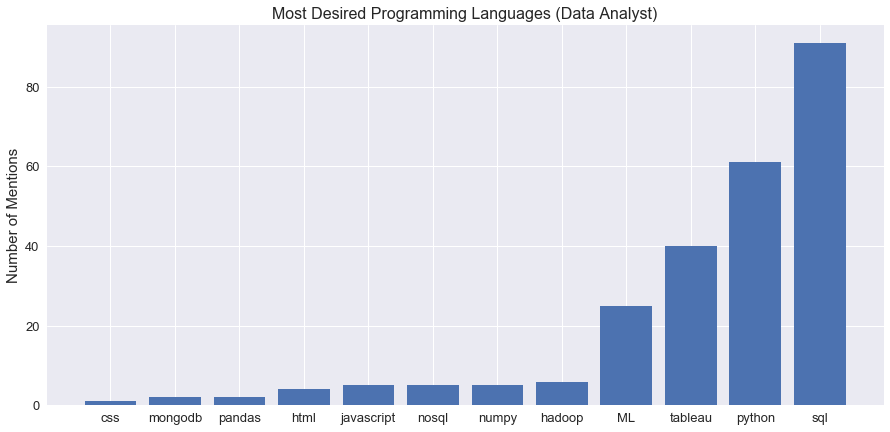

In [14]:
from matplotlib import style
style.use("seaborn")
plt.subplots(figsize=(15,7))
plt.bar(sorted_freq.keys(), sorted_freq.values())
plt.title("Most Desired Programming Languages (Data Analyst)", fontsize=16)
plt.ylabel("Number of Mentions", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
# plt.savefig("most_desired_languages.png")
plt.show()